In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Project Final Report

## These are the roles that each of us did
## We also did tasks interchangeably

### Carson
- Came up with the idea for the project and found the dataset.
- Debugged the graphs and fixed them to predict the correct values.
- Debugged the regression model fixing the train test split and fixing the model so that it predicted the correct values.## Wrote the preprocessing software which pulled the csvs from the API and processed them into usable numpy arrays
- Implemented the front end webserver and html files to display to user. Integrated the front end and the back end by using subprocesses and a flask server.
- Wrote javaScript code to take in user input in two forms and sent it to the flask server via post to be processed.


### Stephen:
 - responsible for the implementation of the ridge regression cross validation model to the currency (data set) of the users choice  
 - implemented the objects that would be passed to the front end
 - worked through a few different approaches about how to go about the linear regression implementation 
 - created the 4 objects that were passed to the front end (the objects were the bar charts, the best graph, the nested dictionary of MAE and RMSE errors for any given polynomial degree, and the predicted value from the model)
 - modulating my functions in a way that was simpler to pass my objects into the front end

## * Topic that we worked on
The topic that we worked on was using a linear regression to predict crypto currency prices x amount of days into the future. We did this by creating an app that uses a flask server acting as the front with a preprocessing and linear regression file acting as the backend. The preprocessing file contained the api which converted the csv files from kaggle.com to pandas data frames which were then converted to numpy arrays. The main part of pre-processing was creating the X and y for the dataset. The X contained the built in 6 columns. The ticker was removed and the time stamp was replaced with days predicted into the future. I also included columns for the golden cross and the death cross. The y is the closing price of the stock x amount of days into the future. 
The main objective of the linear regression file is to return 4 objects to the front end. These objects are the prediction value from the RidgeCV linear regression, a graph of the polynomial degree where our RidgeCV regression is best fit, and 2 bar charts showing the best RMSE and MAE errors at the best degree. The graph contains a line of best fit based on the train set and values of the test set scattered alongside with a big purple X which is the actual predicted value (the train and test sets are the train and test sets from the model with the best polynomial degree). In the context of the polynomial degree that best fits our model, our bar charts show the baseline error value (in our case we used naive_MAE), the best train and test error for RMAE, the best train and test error for MAE.


## * Detailed description of the dataset
The dataset we used is Crypto currencies daily prices by Steven Van Ingelem which is publically available on kaggle.com . The data set contains csv files for 97 crypto currencies. Each csv file contains historical data for each currency going back to shortly after each currency's inception. The csv file for each currency is updated daily. Each currency has its own csv file and each csv file contains six columns. Ticker, Date, open, high, low, and close. The dataset is free to use and also includes a free api with no restrictions on the number of times it can be called. The code for the API is provided on the kaggle website. The api uses kagglehub.load_dataset to automatically process each csv file as a pandas dataframe Using the API required importing the Kaggle DatasetAdapter from the Kaggle Hub library. Here is a link to the data set.  The X and y had to be manually obtained through pre-processing. The X is all four values given plus the simple moving average across the number of days into the future , the golden cross, and the death cross. The original preprocess.py returned an X with all these values and the y was the closing price for the currency x amount of days into the future. https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices/data
Here is the API which was provided. :


-- Install dependencies as needed:
-- pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter


-- Set the path to the file you'd like to load
file_path = ""


--Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "svaningelgem/crypto-currencies-daily-prices",
  file_path,
  -- Provide any additional arguments like
  --sql_query or pandas_kwargs. See the
  -- documenation for more information:
  --https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("First 5 records:", df.head())


## * What we did and how we did it
We made an application that has a front end (powered by a flask server) and 2 primary backend files. One of them is the file that handles the preprocessing of the data and the other handles the creation of the barcharts and the graph with the best fit line and a purple X indicating the price. 
For the preprocessing file, I used the API to download the csvs into a pandas dataframe. After that, I converted the data frames into a numpy array. I then added a column using the simple moving average of the number of days we are predicting in the future and I added columns which detect the golden cross and death cross. The y value is the close date x amount of days into the future. I also used  numpy slicing to remove the ticker and time stamp. I used the number of days since the start of the data set instead of the time stamp.
For the linear regression file that creates the bar charts and that graph for the best polynomial degree, the data is first loaded in from the preprocessing file. After that happens the data is made into X and y via hash mapping (using nested dictionaries). Then after that, the functions get_prediction_at_given_x(), predictionVals_Plot_DictofErrors(), and bar_chart_and_graph() all contribute to making the 4 objects that are returned to the front end. 
get_prediction_at_given_x() returns the prediction that was made by our linear regression model and plots that predicted value as a big purple X. It returns the predicted value and future_day (future_day is used for formatting purposes on the best graph). PredictionVals_Plot_DictOfErrors() is responsible for fitting the data onto the alpha augmented RidgeCV pipeline  and returns a created nested dictionary of the errors of MAE and RMSE, our models predicted value, the best graphs and the best charts. The best graph and the best charts are created and returned by the barchart_and_graph() function.



## * Our graph and bar charts
The 3 visuals that we generated are:

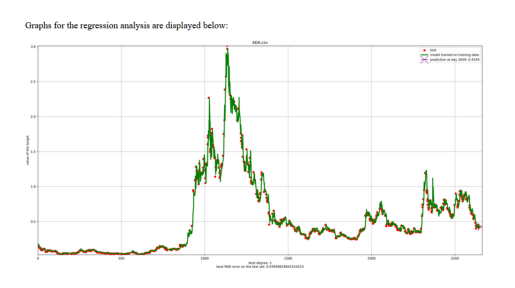

In [6]:
img = mpimg.imread("Screenshot 2025-12-12 211226.png")
plt.imshow(img)
plt.axis("off")
plt.show()


- The graph that shows a big purple X, a green line of best fit, and red test data values. The big purple X is the predicted point N days into the future and the green line is the line of best fit for the training data in order to show the accuracy of the prediction trajectory of our model. The red dots are the values of the testing points. The user is shown these in order to demonstrate the the line of best fit is forecasting well onto the unseen test data.


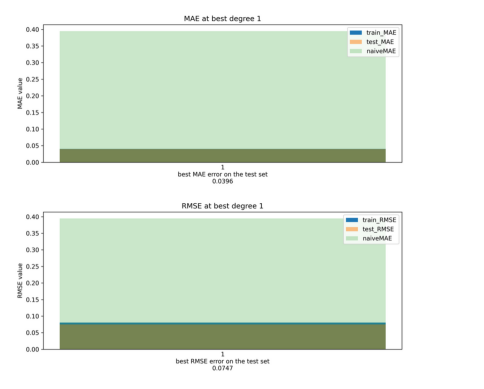

In [7]:
img = mpimg.imread("Screenshot 2025-12-12 210822.png")
plt.imshow(img)
plt.axis("off")
plt.show()


- Both the best RMSE and MAE barcharts have the list the polynomial at wich the model is best fit. In order for these charts to even be possible, a nested dictionary was created as a tool help to find the best polynomial degree and the lowest test RMSE (then lowest MAE as a tie breaker). These bars also show the best RMSE and MAE values themselves on their x labels.

- A screenshot of our website: 


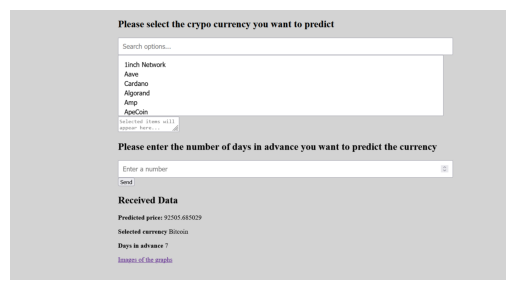

In [8]:
img = mpimg.imread("Screenshot 2025-12-12 194850.png")
plt.imshow(img)
plt.axis("off")
plt.show()


This is the front end that the user can use to select and enter the currency they want to predict and how far into the future they want to predict it. Their input gets sent as a post request to the flask server and the request is sent to the back-end to be processed.  The search options bar can also narrow options while the user is searching.


## * Discussion of the results
The accuracy of our results was possible because we used the ridge RidgeCSV library so that we could use cross validation on heldout folds to find the best alpha value to use for the ridge regression. The resulting RMSE and MAE errors are therefore quite low. The results are more accurate with predictions into the near future. Accuracy decreases as the number of days in advance increases.


## * What we learned
Carson:
I gained more in depth knowledge on how regression works and what it is useful for. I gained more experience with numpy and matplotlib. I also gained experience debugging machine learning models and solving the common errors that arise when using them. I  also learned how to cleanly and efficiently pre-process data. I learned  about how to integrate a python backend with an html/javaScript front end using a flask server.I also found out the hard way that it is very important to time all processes that are being run, otherwise a large amount of None type errors will occur. I also gained experience in matplotlib and how to get the graphs to look the way I want them to. I also learned more about the hyper parameters. I learned about how alpha also learned how to use the subprocess commands in order to execute commands on different files in the correct order rather than importing them and having each file be run as soon as the flask server starts. I also learned about the different types of methods used to measure accuracy in regression including MAE, RMSE, and MSE. I learned how to effectively work with and communicate with my teammate who has a completely different schedule. 

Stephen:
I learned a lot about the underlying concepts of how to instantiate, split the data for train and test, and visualize the results using pyplot. I learned a lot about how to print out various different visuals by learning about what specific class will fit my specific need, such as the various things that you can do with .plot(), .scatter(), and .legend(). I also learned about new ideas of how to approach a forecasting problem like this by asking AI to teach me a potential approach of how to solve a specific problem or teach/remind me of techniques that I could use. For example, after I made the nested dictionary of various errors for RMSE and MAE for the test and train sets, I learned that you can extract the best degree in that dictionary by making it into a pandas dataframe and use .sort() to find the degree (or row) with the lowest RMSE. And if there is a tie between rows then the function would sort by the row with the lowest MAE. The reason why it is in this order is because RMSE punishes larger residuals (or true - predicted) and our fall back if there is a tie between best RMSE error values between polynomial degrees can be MAE since MAE punishes smaller residuals and is therefore less sensitive to outliers and better for punishing smaller residuals. I also learned a lot about using nested dictionaries (or pretty much hash mapping) to my advantage since they are really fast and easy to use. This really helped me in instantiating the X (the features or data) and the y (the labels) that I pulled from the preprocessing file. I also learned how to better use indexing since this was a little confusing to me in the past. I also learned how to transform the input features (expands the inputs to higher degrees) to all polynomial combinations (eight separate models with degrees 1-8) and then apply the RidgeCV regression algorithm to these expanded features. I re-learned that these can both be done sequentially with Pipeline(). Case in point, this project was a great opportunity to re-inforce and more deeply learn how to apply these algorithms and measurements to this projects main objective. My main sources were the class slides, the homeworks, the official pyplot, pandas, and sklearn websites (for learning the significance and functionalities of parameters and hyper parameters for a given module), and AI (in order to re-iterate concepts and help with syntax). Lastly I learned how to modulate all of these functions in order to make the creation of the visuals and resulting metrics more readable and efficient.